In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [44]:
threes = pd.read_csv('../scripts/all_3_results.csv', header=None)
threes.columns = ['sequence', 'num_results']

In [47]:
threes.loc[:, 'sequence'] = threes.loc[:, 'sequence'].astype(str)

In [48]:
threes.num_results

0        13700000.0
1         1590000.0
2         5850000.0
3         2520000.0
4         1170000.0
            ...    
17571       78800.0
17572      155000.0
17573      193000.0
17574      214000.0
17575     1870000.0
Name: num_results, Length: 17576, dtype: float64

In [49]:
threes.sequence

0        aaa
1        aab
2        aac
3        aad
4        aae
        ... 
17571    zzv
17572    zzw
17573    zzx
17574    zzy
17575    zzz
Name: sequence, Length: 17576, dtype: object

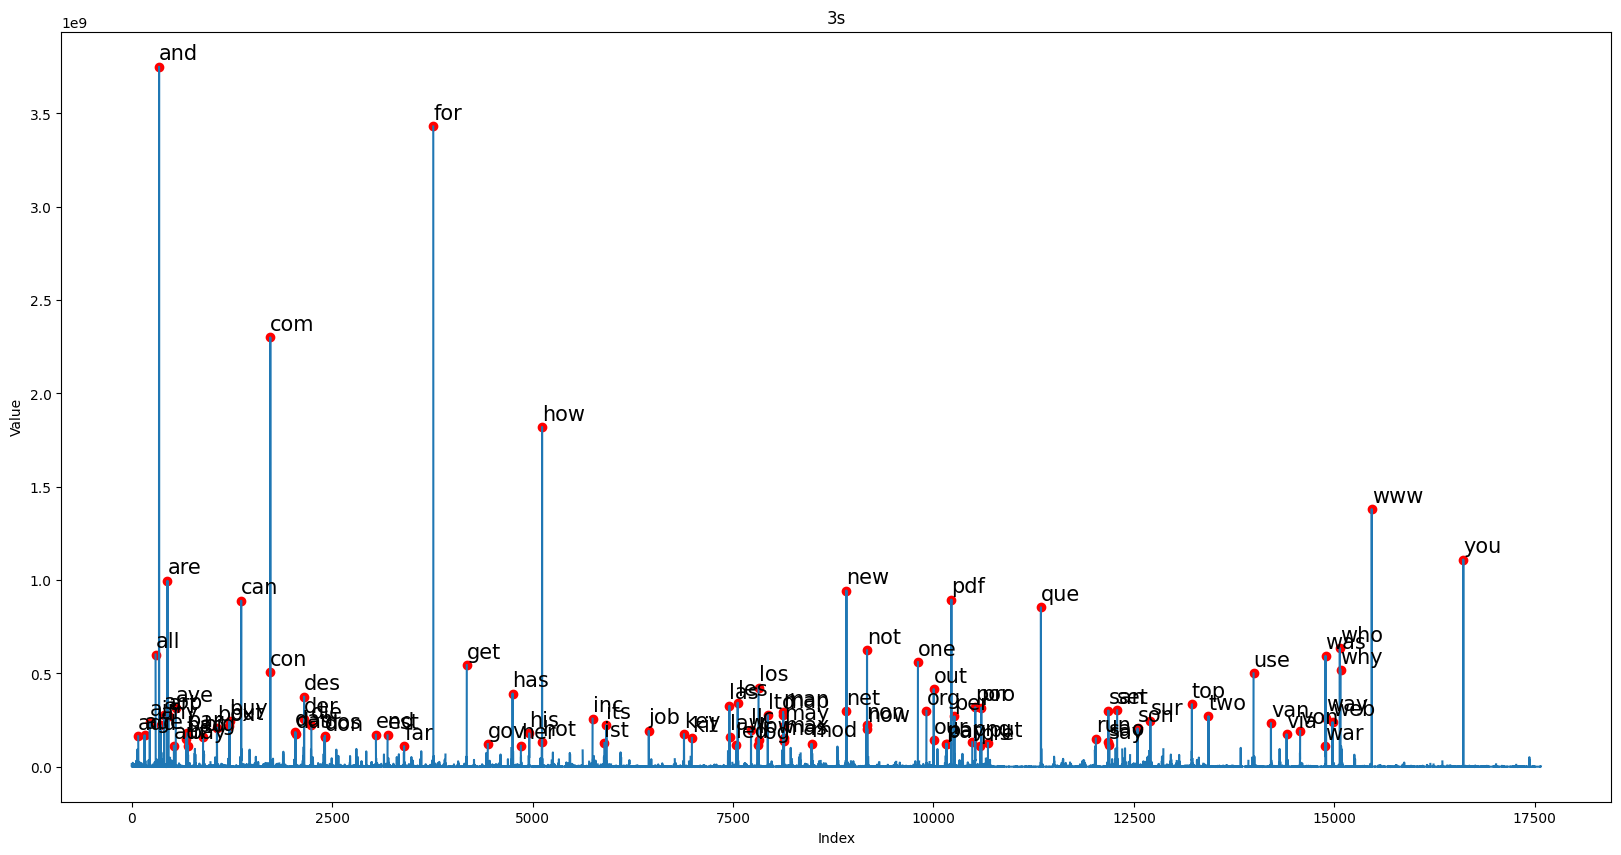

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(threes.num_results)
# label the highest 100 points with their index 
# get 100 highest values
highest = threes.num_results.nlargest(100)
# get the index of those values
highest_index = highest.index
# get the values at those indices
highest_values = threes.num_results[highest_index]

highest_labels = threes.sequence[highest_index]

# plot the values and label them
v_shift = max(highest_values) * 0.01
ax.scatter(highest_index, highest_values, color='red')
for i, label in zip(highest_index, highest_labels):
    ax.annotate(label, (i, highest_values[i] + v_shift), color='black', fontsize=15)





ax.set_title('3s')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
plt.savefig('../figures/3s_highest.png', bbox_inches='tight')
plt.show()




In [30]:
threes['one_over'] = 1 / threes.num_results

# remove row with highest one_over value 
threes = threes[threes['one_over'] != threes['one_over'].max()]






In [31]:
threes

,sequence,num_results,one_over
0,aaa,13700000.0,7.299270e-08
1,aab,1590000.0,6.289308e-07
2,aac,5850000.0,1.709402e-07
3,aad,2520000.0,3.968254e-07
4,aae,1170000.0,8.547009e-07
...,...,...,...
17571,zzv,78800.0,1.269036e-05
17572,zzw,155000.0,6.451613e-06
17573,zzx,193000.0,5.181347e-06
17574,zzy,214000.0,4.672897e-06


11086    0.000026
16127    0.000022
10995    0.000021
10000    0.000021
9888     0.000020
           ...   
3805     0.000016
11061    0.000016
14622    0.000016
10996    0.000016
15740    0.000016
Name: one_over, Length: 100, dtype: float64
11086    qkk
16127    xwh
10995    qgx
10000    ouq
9888     oqi
        ... 
3805     fqj
11061    qjl
14622    vqk
10996    qgy
15740    xhk
Name: sequence, Length: 100, dtype: object


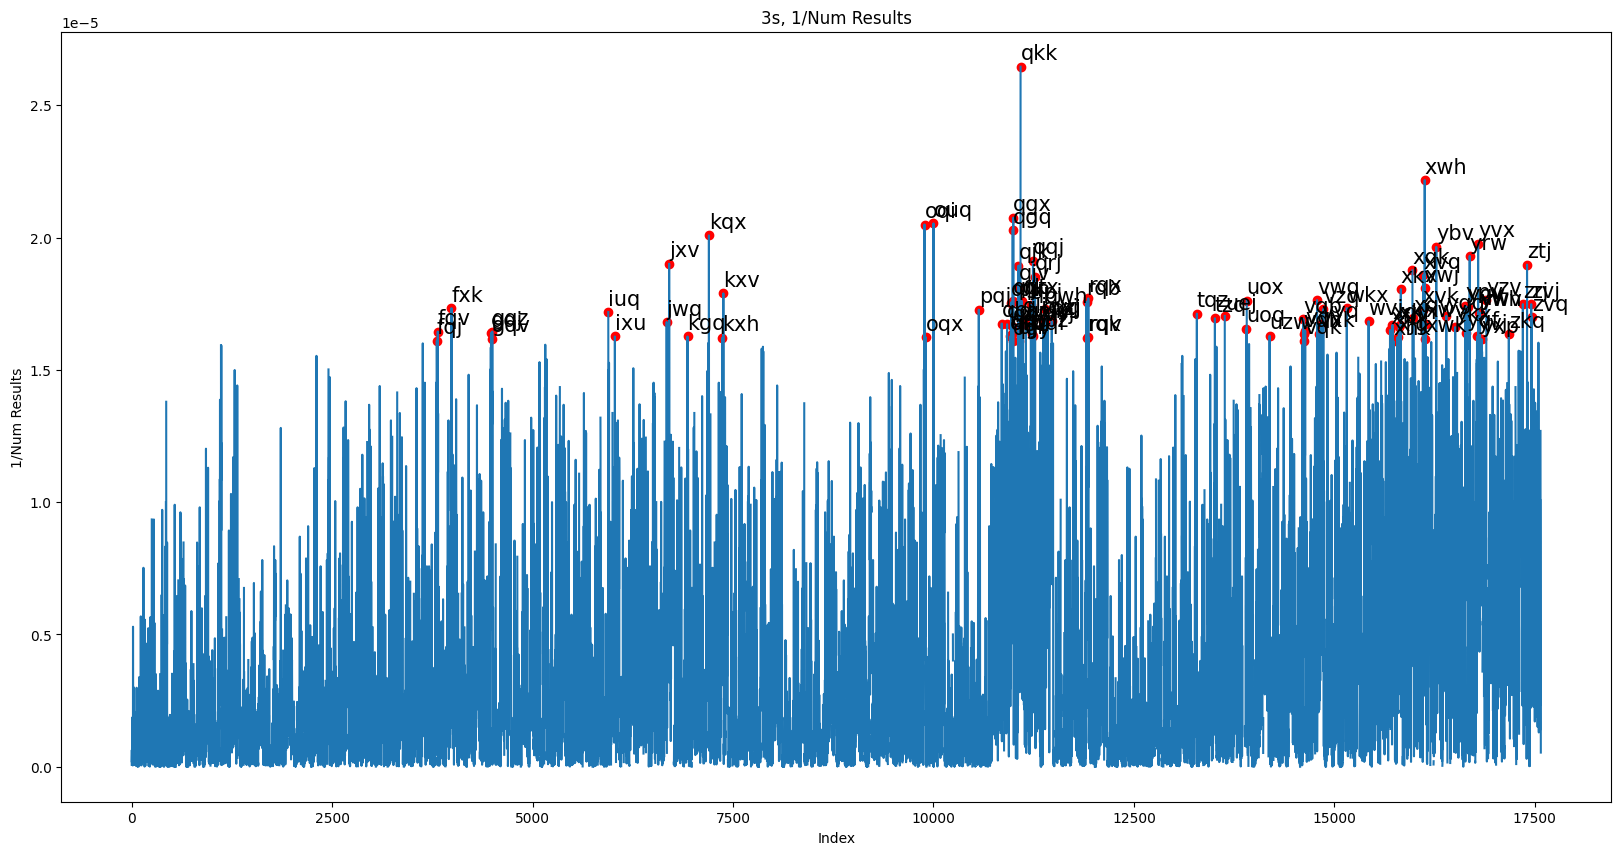

In [32]:
# Generate identical, inverse plot of above for 3s
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(threes['one_over'])
# label the highest 100 points with their index
# get 100 lowest values
lowest = threes.num_results.nsmallest(100)
# get the index of those values
lowest_index = lowest.index
# get the values at those indices
lowest_values = threes['one_over'][lowest_index]

lowest_labels = threes.sequence[lowest_index]

print(lowest_values)
print(lowest_labels)

# plot the values and label them
v_shift = max(lowest_values) * 0.01
ax.scatter(lowest_index, lowest_values, color='red')
for i, label in zip(lowest_index, lowest_labels):
    ax.annotate(label, (i, lowest_values[i] + v_shift), color='black', fontsize=15)

ax.set_title('3s, 1/Num Results')
ax.set_xlabel('Index')
ax.set_ylabel('1/Num Results')
plt.savefig('../figures/3s_lowest.png', bbox_inches='tight')
plt.show()

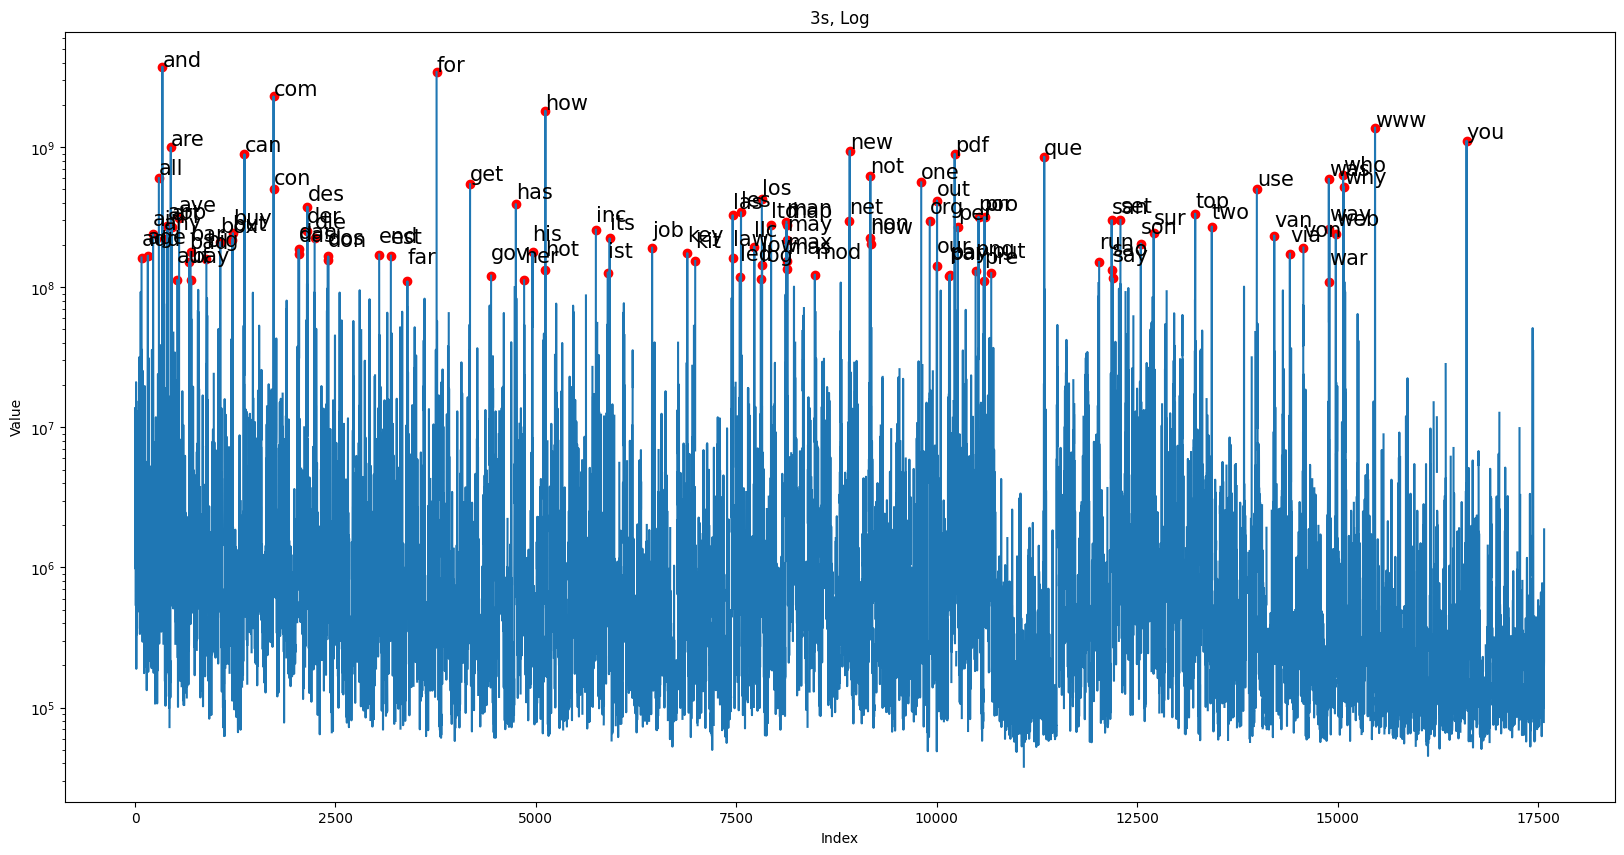

In [33]:
# log version of highest plot 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(threes.num_results)
# label the highest 100 points with their index
# get 100 highest values
highest = threes.num_results.nlargest(100)
# get the index of those values
highest_index = highest.index
# get the values at those indices
highest_values = threes.num_results[highest_index]

highest_labels = threes.sequence[highest_index]

# plot the values and label them
v_shift = max(highest_values) * 0.01
ax.scatter(highest_index, highest_values, color='red')
for i, label in zip(highest_index, highest_labels):
    ax.annotate(label, (i, highest_values[i] + v_shift), color='black', fontsize=15)

ax.set_title('3s, Log')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_yscale('log')
plt.savefig('../figures/3s_highest_log.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [51]:
vowels = ['a','e','i','o','u','y']

def vowel_check(seq, vowels): 
    for l in seq: 
        if l in vowels: 
            return True 
    else: 
        return False 

In [52]:
threes['vowel'] = threes['sequence'].apply(lambda x: vowel_check(x, vowels))

In [53]:
threes['vowel'].describe()

count     17576
unique        2
top        True
freq       9576
Name: vowel, dtype: object

In [54]:
vowels_subset = threes[threes['vowel'] == True]

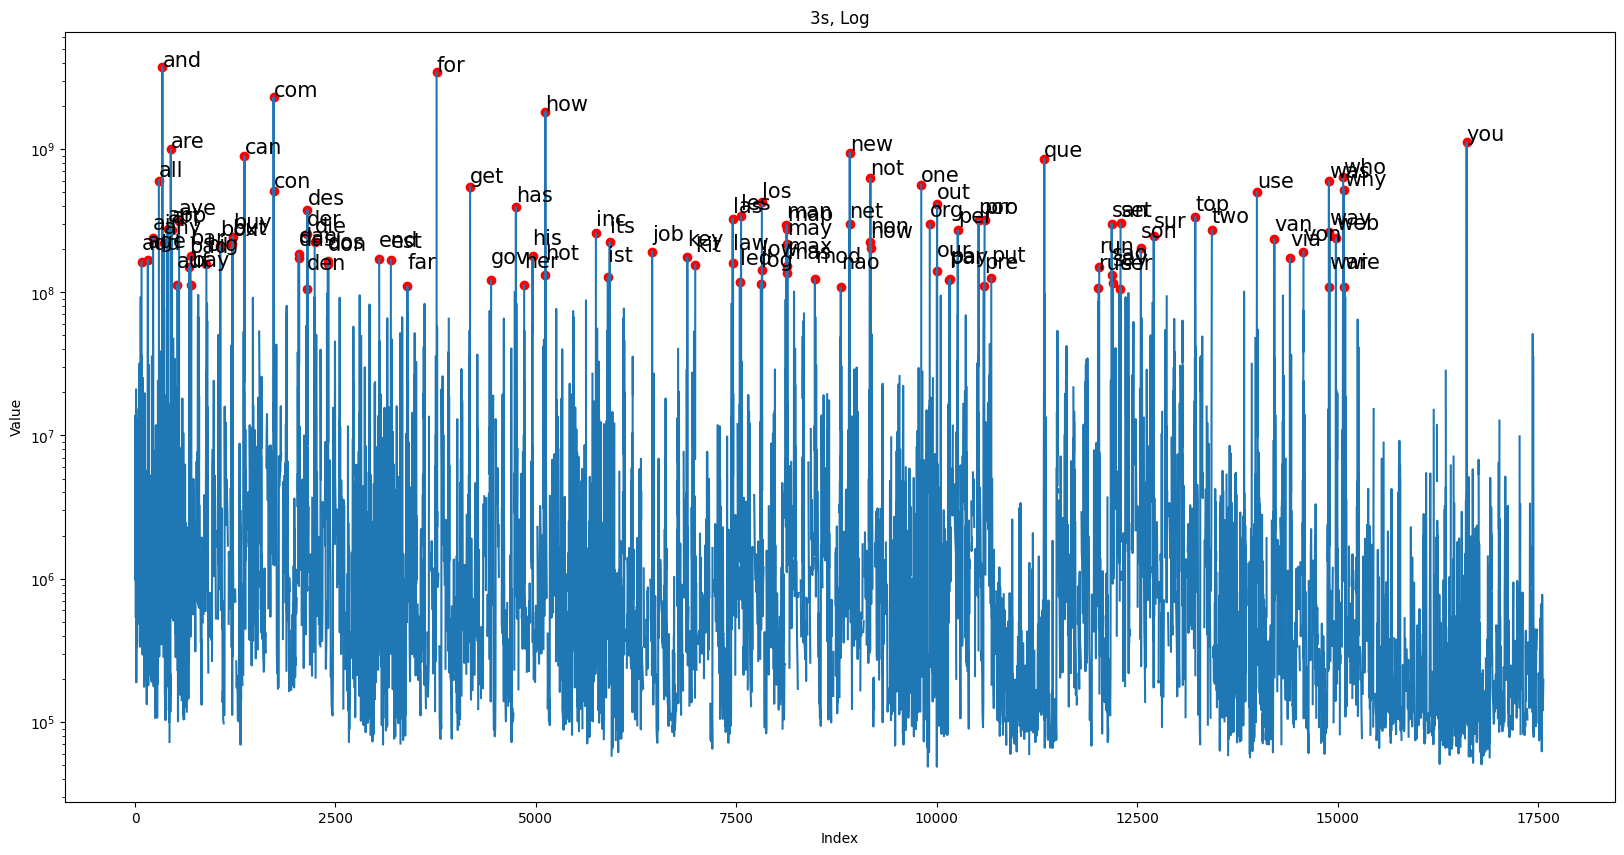

In [55]:
# log version of highest plot, only for vowels
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(vowels_subset.num_results)
# label the highest 100 points with their index
# get 100 highest values
highest = vowels_subset.num_results.nlargest(100)
# get the index of those values
highest_index = highest.index
# get the values at those indices
highest_values = vowels_subset.num_results[highest_index]

highest_labels = vowels_subset.sequence[highest_index]

# plot the values and label them
v_shift = max(highest_values) * 0.01
ax.scatter(highest_index, highest_values, color='red')
for i, label in zip(highest_index, highest_labels):
    ax.annotate(label, (i, highest_values[i] + v_shift), color='black', fontsize=15)

ax.set_title('3s, Log')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_yscale('log')
plt.savefig('../figures/3s_highest_log.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# 1/num_results plot, only for vowels 
# Generate identical, inverse plot of above for 3s
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(threes['one_over'])
# label the highest 100 points with their index
# get 100 lowest values
lowest = threes.num_results.nsmallest(100)
# get the index of those values
lowest_index = lowest.index
# get the values at those indices
lowest_values = threes['one_over'][lowest_index]

lowest_labels = threes.sequence[lowest_index]

print(lowest_values)
print(lowest_labels)

# plot the values and label them
v_shift = max(lowest_values) * 0.01
ax.scatter(lowest_index, lowest_values, color='red')
for i, label in zip(lowest_index, lowest_labels):
    ax.annotate(label, (i, lowest_values[i] + v_shift), color='black', fontsize=15)

ax.set_title('3s, 1/Num Results')
ax.set_xlabel('Index')
ax.set_ylabel('1/Num Results')
plt.savefig('../figures/3s_lowest.png', bbox_inches='tight')
plt.show()